# COVID-19 Data Analysis Project

This project aims to analyze the spread and impact of the COVID-19 pandemic using publicly available datasets. We will use data from the Johns Hopkins University COVID-19 dataset to explore the number of confirmed cases, recoveries, and deaths across various countries and regions. Additionally, we'll incorporate data from the World Happiness Report to investigate potential correlations between a country's socio-economic factors (such as GDP, social support, and life expectancy) and the maximum infection rates.

#### Import the module

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

#### Load the dataset

In [4]:
df = pd.read_csv("C:/Users/hp/Downloads/covid19_Confirmed_dataset.csv")
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Check the shape of dataset

In [5]:
df.shape

(266, 104)

In [6]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

#### Deleting the Columns

Latitude and Longitude are not important features for us here, so I remove them.

In [7]:
df.drop(["Lat","Long"], 
        axis=1, # default value, operations will be applied across columns, (axis = 0 for rows)
        inplace = True # inplace=True modifies the original dataset directly instead of returning a new copy. 
        )

In [8]:
df

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df.drop(["Province/State"], axis=1, inplace=True) 

In [10]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Western Sahara,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,Yemen,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,Comoros,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Aggregating the rows by the country

In [11]:
df_agregated = df.groupby("Country/Region").sum()
df_agregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


The line of code df_agregated = df.groupby("Country/Region").sum() groups the data by the "Country/Region" column and calculates the sum of all numerical columns for each group.

In [12]:
df_agregated.shape

(187, 100)

#### Visualizing the data related to Country

In [13]:
df_agregated.loc["China"]

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

In [14]:
df_agregated.loc["Pakistan"]

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
4/26/20    13328
4/27/20    13915
4/28/20    14612
4/29/20    15525
4/30/20    16817
Name: Pakistan, Length: 100, dtype: int64

<Axes: >

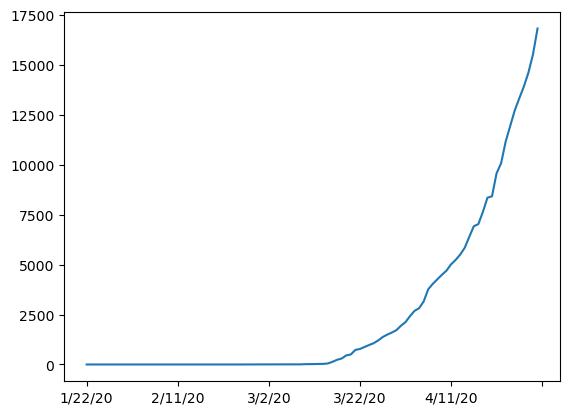

In [15]:
df_agregated.loc['Pakistan'].plot()

<Axes: >

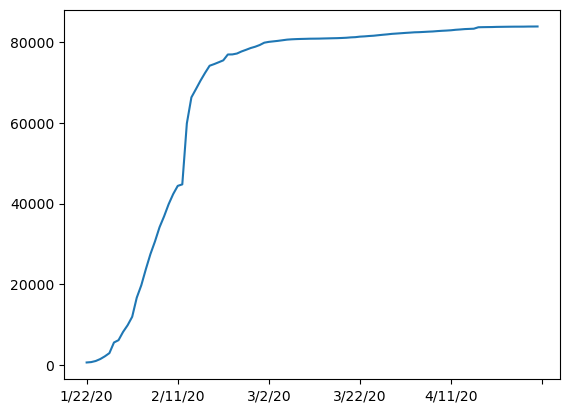

In [16]:
df_agregated.loc['China'].plot()

<Axes: >

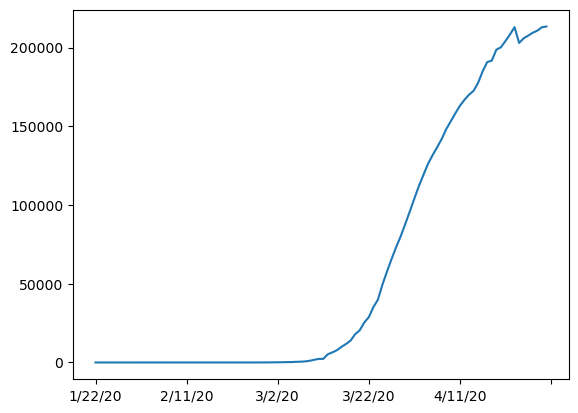

In [17]:
df_agregated.loc['Spain'].plot()

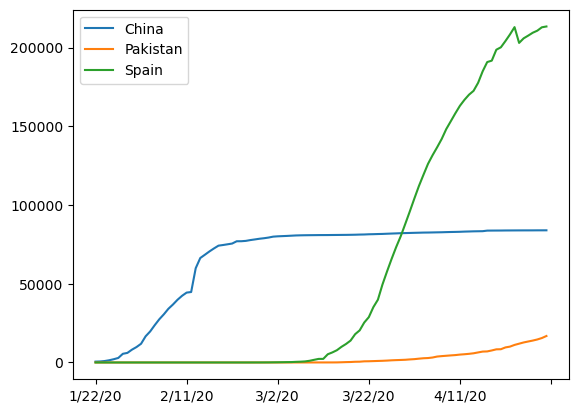

In [18]:
df_agregated.loc['China'].plot()
df_agregated.loc['Pakistan'].plot()
df_agregated.loc['Spain'].plot()
plt.legend()

#### Spread of the virus in China for the first 5 dates only

<Axes: >

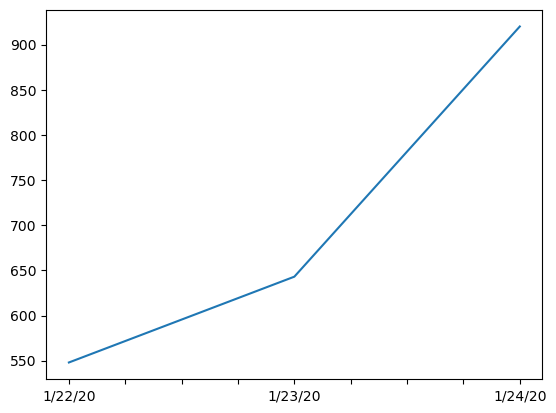

In [19]:
df_agregated.loc['China'][:3].plot()

In the first 24 hours, there was an increase of 100 new cases, and in the second 24 hours, an increase of 250 new cases. 
The average number of new cases per 24 hours is 175, while the maximum increase in a single 24-hour period is 250.

#### Caculating the first derivative of the curve

<Axes: >

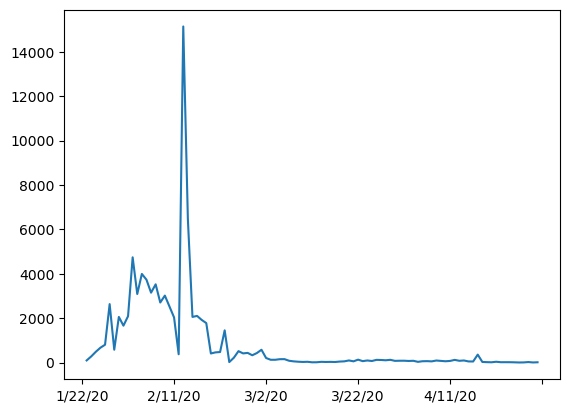

In [21]:
df_agregated.loc["China"].diff().plot()

The code `df_agregated.loc["China"].diff().plot()` selects the data for China from the DataFrame, calculates the difference between consecutive values (e.g., daily new cases), and then plots these differences. This visualizes the trend of new cases over time.

<Axes: >

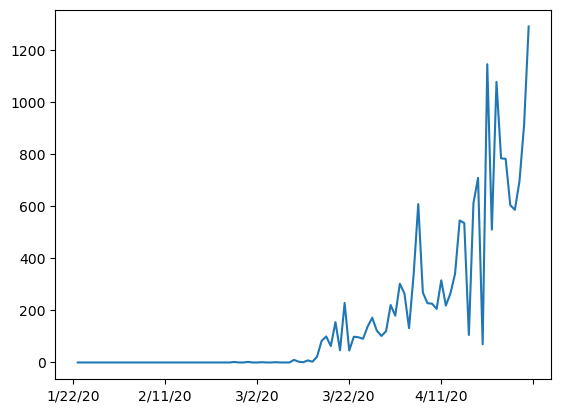

In [70]:
df_agregated.loc["Pakistan"].diff().plot()

#### Find maxmimum infection rate for China

In [67]:
df_agregated.loc["China"].diff().max()
#In only 24 hrs, the difference was 15136

15136.0

In [71]:
df_agregated.loc["Italy"].diff().max() # in Italy

6557.0

In [72]:
df_agregated.loc["Pakistan"].diff().max() # in Pakistan

1292.0

#### Find maximum infection rate for all of the countries.

In [73]:
countries = list(df_agregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(df_agregated.loc[c].diff().max())
max_infection_rates

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [74]:
df_agregated["max_infection_rates"] = max_infection_rates

In [76]:
df_agregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


#### Create a new dataframe with only needed column

In [83]:
corona_data = pd.DataFrame(df_agregated["max_infection_rates"])
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


# Happiness Correlation Analysis

In this analysis, we will import the **WorldHappinessReport.csv** dataset and select relevant columns such as country names, happiness scores, and key indicators like GDP per capita and social support. We will then join this dataset with additional relevant datasets to provide a comprehensive view of happiness determinants. Finally, we will calculate the correlations between happiness scores and the selected indicators to identify significant relationships that inform policies aimed at enhancing well-being.

In [85]:
happiness_report = pd.read_csv("C:\\Users\\hp\\Downloads\\worldwide_happiness_report.csv")

In [86]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### Delete the useless Columns

In [87]:
happiness_report.drop(["Overall rank", "Score", "Generosity", "Perceptions of corruption"], axis=1, inplace = True)

In [89]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


#### Changing the index of the dataframe

In [90]:
happiness_report.set_index("Country or region", inplace=True)

In [91]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


#### Now join two dataset we have prepared

#### Corona Dataset

In [93]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [94]:
corona_data.shape    

(187, 1)

#### Wolrd Happiness Report Dataset :

In [96]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [98]:
happiness_report.shape 

(156, 4)

In [99]:
#Inner join
data = corona_data.join(happiness_report,
                how = "inner"    #method/type of join
                )
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


This code merges the two datasets based on their indices, resulting in a new dataset that includes only the rows with matching indices from both corona_data and happiness_report_csv, allowing for a combined analysis of COVID-19 data and happiness metrics.

#### Correlation Matrix

In [100]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


data.corr() is a powerful function for quantifying and analyzing the relationships between variables in the dataset, helping to uncover insights about how different factors may influence each other. The function calculates the correlation coefficients, which measure the strength and direction of the linear relationship between two variables. The values range from -1 to 1:

1 indicates a perfect positive correlation (as one variable increases, the other also increases).

-1 indicates a perfect negative correlation (as one variable increases, the other decreases).

0 indicates no correlation (there is no linear relationship between the variables).

### Visualization of the results

#### Plotting GDP vs maximum Infection rate

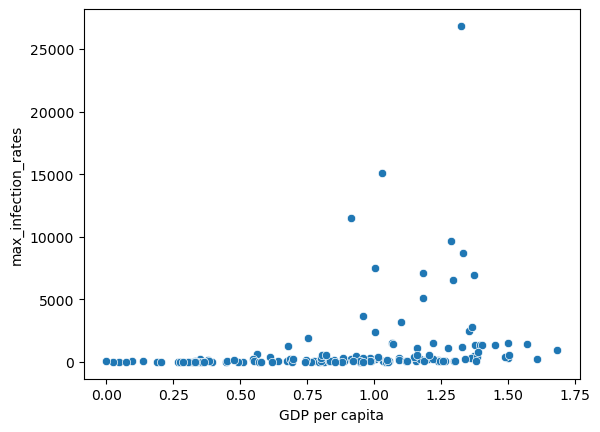

In [108]:
sns.scatterplot(data=data, x="GDP per capita", y="max_infection_rates")
plt.show()

### Scatter Plot

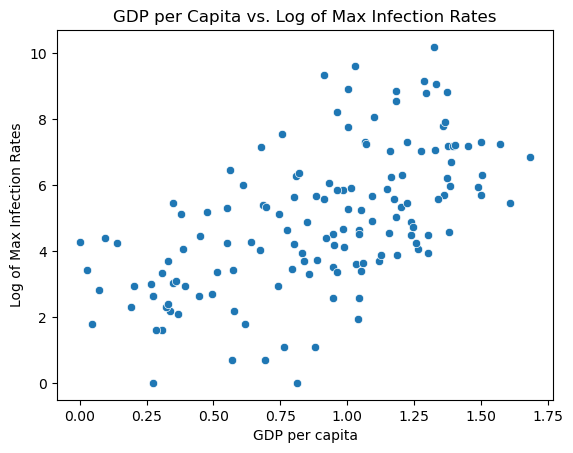

In [111]:
sns.scatterplot(data=data, x="GDP per capita", y=np.log(data["max_infection_rates"]))
plt.xlabel("GDP per capita")
plt.ylabel("Log of Max Infection Rates")
plt.title("GDP per Capita vs. Log of Max Infection Rates")
plt.show()

### Regression Plot

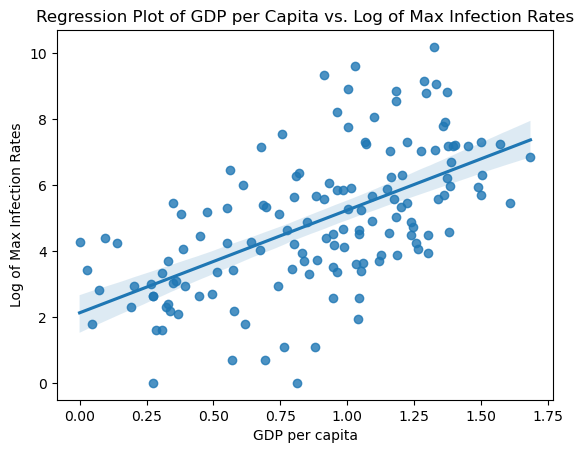

In [113]:
sns.regplot(data=data, x="GDP per capita", y=np.log(data["max_infection_rates"]))
plt.xlabel("GDP per capita")
plt.ylabel("Log of Max Infection Rates")
plt.title("GDP per Capita vs. Log of Max Infection Rates")
plt.show()

## Plotting Social support vs maximum Infection 

#### Scatter Plot Social Support vs. Log of Max Infection Rates

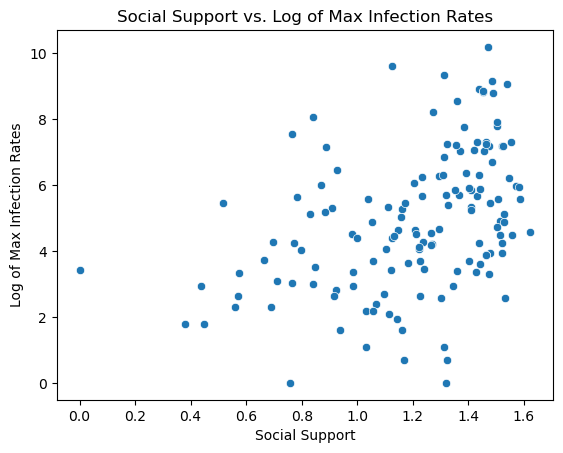

In [117]:
sns.scatterplot(data=data, x="Social support", y=np.log(data["max_infection_rates"]))
plt.xlabel("Social Support")
plt.ylabel("Log of Max Infection Rates")
plt.title("Social Support vs. Log of Max Infection Rates")
plt.show()

### Regression Plot of Social Support vs. Log of Max Infection Rates

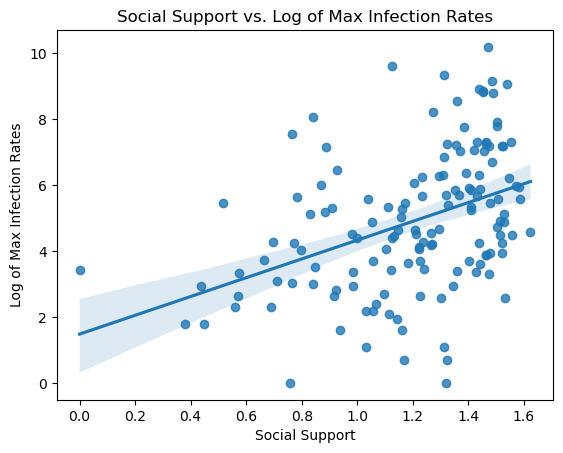

In [120]:
sns.regplot(data=data, x="Social support", y=np.log(data["max_infection_rates"]))
plt.xlabel("Social Support")
plt.ylabel("Log of Max Infection Rates")
plt.title("Social Support vs. Log of Max Infection Rates")
plt.show()

### Plotting Healthy life expectancy vs maximum Infection rate

#### Scatter Plot of Healthy Life Expectancy vs. Log of Max Infection Rates

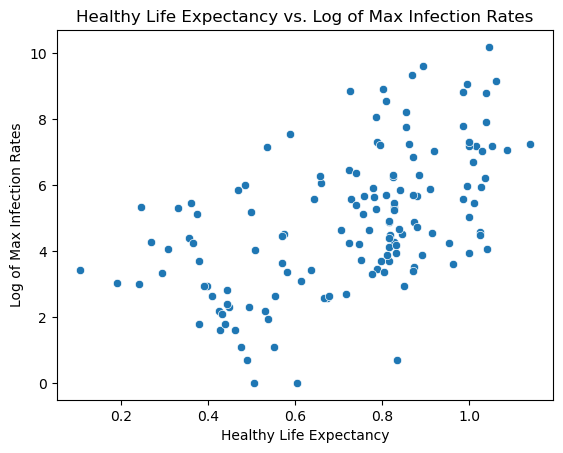

In [124]:
sns.scatterplot(data=data, x="Healthy life expectancy", y=np.log(data["max_infection_rates"]))
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Log of Max Infection Rates")
plt.title("Healthy Life Expectancy vs. Log of Max Infection Rates")
plt.show()

#### Regression Plot of Healthy Life Expectancy vs. Log of Max Infection Rates

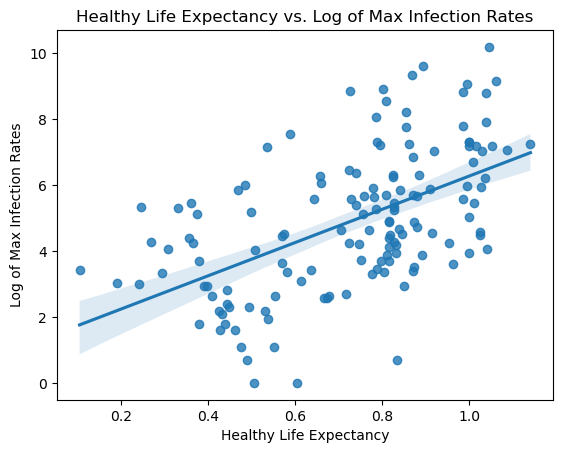

In [127]:
sns.regplot(data=data, x="Healthy life expectancy", y=np.log(data["max_infection_rates"]))
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Log of Max Infection Rates")
plt.title("Healthy Life Expectancy vs. Log of Max Infection Rates")
plt.show()

### Plotting Freedom to make life choices vs maximum Infection rate

#### Scatter Plot of Freedom to Make Life Choices vs. Log of Max Infection Rates

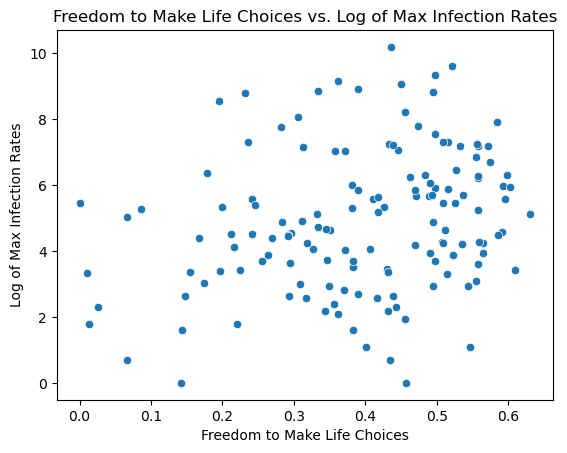

In [128]:
sns.scatterplot(data=data, x="Freedom to make life choices", y=np.log(data["max_infection_rates"]))
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Log of Max Infection Rates")
plt.title("Freedom to Make Life Choices vs. Log of Max Infection Rates")
plt.show()

#### Regression Plot of Freedom to Make Life Choices vs. Log of Max Infection Rates

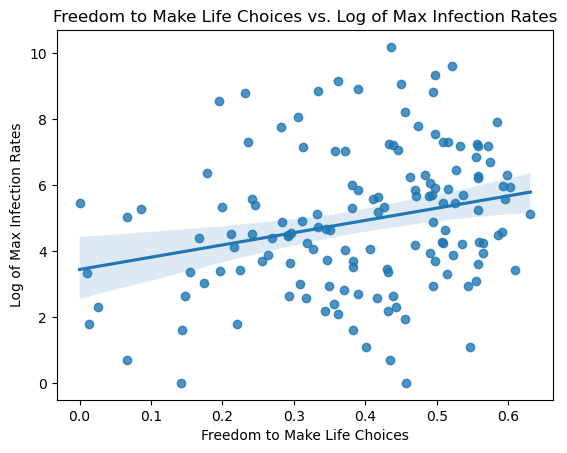

In [130]:
sns.regplot(data=data, x="Freedom to make life choices", y=np.log(data["max_infection_rates"]))
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Log of Max Infection Rates")
plt.title("Freedom to Make Life Choices vs. Log of Max Infection Rates")
plt.show()